# Exercise # 2  Spectral Analysis of LFP and EEG 

In [2]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 


In [3]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e

### Problem #1

##### Write a script to evaluate the dot product between two sinusoids as the frequency of one of the sinusoids is being changed.   

#### (a) Assume the sampling rate is 100 Hz and the interval is 1 sec one of the frequencies is 5 Hz and the other frequency changes from 3 to 7 in steps of 0.1. Make a plot of the difference in frequency (from -2 to 2 Hz verus the value of the dot product)     

#### (b) Run the code above for T = 1,2,5 and make labeled plots 

#### (c) Create a markdown box to write down what you think you see here.  

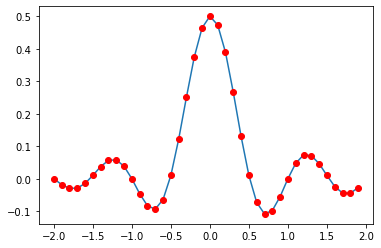

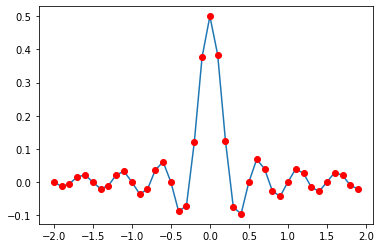

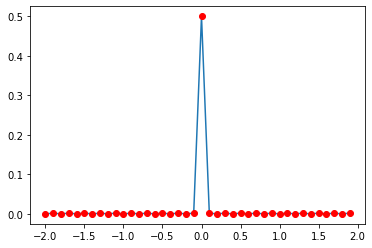

In [4]:

 
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 #This is the total length (in seconds) of the interval. # this is the epoc 

Ts = [1,2,5]

for x in Ts:
    T = x #This is the total length (in seconds) of the interval. # this is the epoc
    t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  #manipulate phase (theta) 
    es = dict()
    f = np.arange(3,7,0.1)
    fplot = f -5 
    nsamp = np.size (t)
    nof = np.size(f)
    dp = np.zeros(nof)
    for j in range (nof):
        es[0] = sinusoid(f[j],t)
        es[1] = sinusoid(5,t)
        dp[j] = np.sum(es[0]*es[1])/nsamp
    plt.plot(fplot,dp)
    plt.plot(fplot,dp,'ro')
    plt.show()
   


As we increase the time interval our ability to see the changes within the graph descreases. 
For instance in the last graph (T=5) we are only able to identlity a peak at 0 and nthing else. 
Futhermore the graph gets steeper around 0 when the peal occurs.

### Problem #2 

#### I want you to use the FFT algorithm to investigate the amplitudes of the frequency content of a Local Field Potential (LFP) signal recorded from the rat hippocampus, by visualizing it and averaging the amplitudes. 

#### This dataset comes from an openly accessible neuroscience database. For more information on this particular dataset, see [here](https://crcns.org/data-sets/hc/hc-2/about-hc-2).

#### You will notice that the LFP signal has a very prominent rhythmic component, with peaks near, for example, 0.25, 0.37, and 0.5 seconds. Therefore, it has a **periodicity of about 0.125 seconds**, or a **frequency of 8Hz**. This is a very famous brain oscillation, called the theta oscillation which is central to memory functions. 

#### (a) Use the FFT examples as a guide on how to compute and visualize the amplitude spectrum.  Compute the amplitude spectrum of the segment of the data plotted below (lfp_short).

#### (b) Visualize the amplitude on a linear and on a logarithmic scale. You can do this by take the log of the amplitude, but you can also do it by choosing a logarithmic scale when you call plot. 

#### (c) Make a loop to segment 10 consecutive epochs from the LFP file, and compute the amplitude of each epoch and plot them all on the same graph. 

#### (d) Extend your loop to compute the average amplitude spectrum of a set of m epochs. Make a graph that shows the average amplitude spectrum of the first m = 10, m = 20, and m = 40 epochs.  


dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


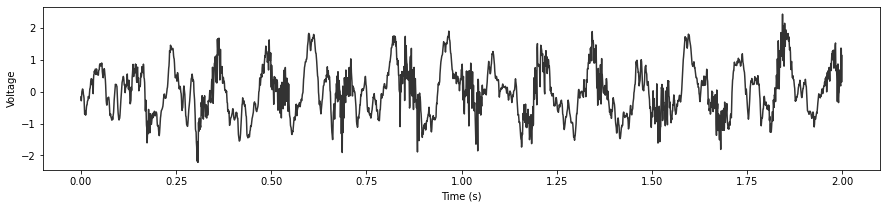

In [5]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps
T = 2# segment length hand pick 
nsamp = T*fs # number of samples is the segment length. total number of sample always 

lfp = data['lfp'][0,:]/1000 #. 1000 bc how data was stored 
lfp_short = lfp[range(0,nsamp)] # make a variable that has only the first T seconds of the LFP
t_short = np.arange(0, len(lfp_short)*deltaT, deltaT) # create the corresponding time vector
plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

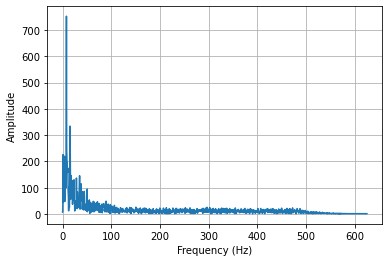

In [6]:
#part a
xf = fft(lfp_short) #take the fft 
amplitude = np.abs(xf)
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)/T
plt.plot(f_n,amplitude[0:nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

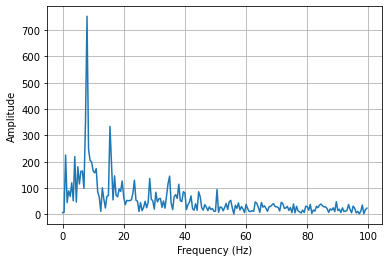

In [7]:
deltaF = 1/T  #frequency steps .  1/2
maxf = 100  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot. 
plt.plot(f_n[0:maxbin],amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



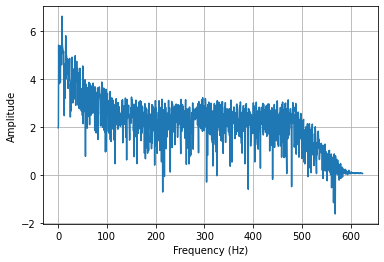

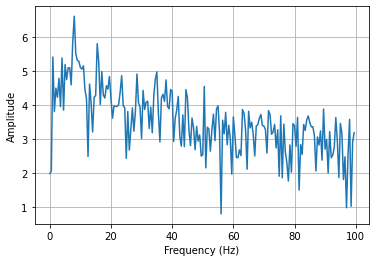

In [8]:
#part b
xf = fft(lfp_short) #take the fft 
amplitude = np.abs(xf)
log_amplitude = np.log(amplitude)
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.

f_n = np.arange(0,nf)/T
plt.plot(f_n,log_amplitude[0:nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

deltaF = 1/T  #frequency steps .  1/2
maxf = 100  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot. 
plt.plot(f_n[0:maxbin],log_amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

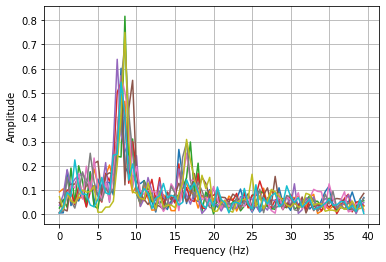

In [12]:
#c lets get 10 epochs, compute fft and plot 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 40  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 
for j in range(10):
    lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
    xf = fft(lfp_short)
    amplitude = 2*np.abs(xf)/nsamp #always divide by number of samples. 2 x for negative frequencies 
    plt.plot(f_n[0:maxbin],amplitude[0:maxbin]) 

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

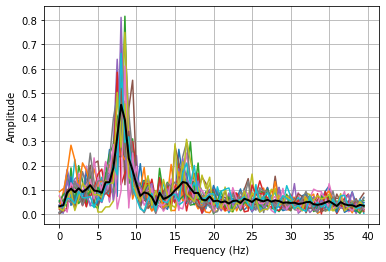

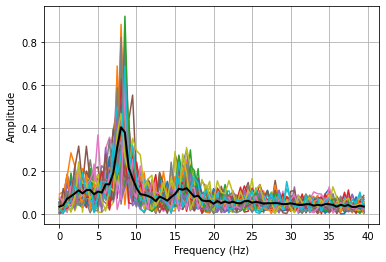

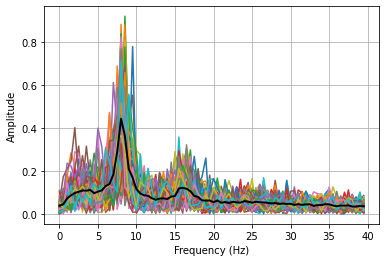

In [16]:
#d averaging them together. 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 40  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 

for x in (20,40,80):
    nepochs = x
    amplitude = np.zeros((x,nf))
    for j in range(nepochs):
        lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
        xf = fft(lfp_short)
        amplitude[j,:] = 2*np.abs(xf[0:nf])/nsamp #always divide by number of samples. 2 x for negative frequencies 
        plt.plot(f_n[0:maxbin],amplitude[j,0:maxbin]) #plot the individual epoch spectra (YOU DONT NEED TO DO THIS FOR THE HWK)
    amplitude_avg = np.mean(amplitude,axis = 0) #take the average over all epochs
    plt.plot(f_n[0:maxbin],amplitude_avg[0:maxbin],'k',linewidth=2) 
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()